# Classification: Performance of the Naive Bayes algorithm on the given data set
Run theNaive Bayes tool on the resulting version of **`train_gr_smpl`**. To be able to do this in Weka, you may
need to apply several Weka “Filters”. Explain the reason for choosing and using these filters. Once
you can run the algorithm, record, compare and analyse the classifier’s accuracy on different classes
(as given by the confusion matrix).

### Proportional k-interval discretization
 According to the course textbook Equal Frequency binning is excellent for Naive bayes.
 
 **Specifically when the number of bins is equal to the sqaure root of the number of instances.** This is called Proportional k-interval discretization

In [29]:
import pandas
import os.path

def _get_data(filepath):
    """Use get_random_data() instead. 
    Get Dataframe with randomized instance order, takes filepath as arg"""
    df = pandas.read_csv(filepath)
    return df

def _get_file_path(filename):
    """Construct the filepath string, takes name of file as arg"""
    my_path = os.path.abspath(os.path.dirname("Data/"))
    return os.path.join(my_path, filename)

def get_data(filename):
    """Get Dataframe with randomized instance order, takes filename as arg"""
    return _get_data(_get_file_path(filename))

# Example of how to get randomised data from a file in the 'Data' folder
X_dataset = get_data('x_train_gr_smpl.csv')
Y_dataset = get_data('y_train_smpl_0.csv')
# print(Y_dataset)

      0
0     0
1     0
2     0
3     0
4     0
...  ..
9685  1
9686  1
9687  1
9688  1
9689  1

[9690 rows x 1 columns]


In [30]:
from sklearn.model_selection import train_test_split

# With randomization (randomizes in connectin with test set)
# X_train, X_test, Y_train, Y_test = train_test_split(X_dataset, Y_dataset, test_size=0.4, random_state=1)

# Without randomization
X_train, X_test, Y_train, Y_test = train_test_split(X_dataset, Y_dataset, test_size=0.4)

In [31]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

model = GaussianNB()

model = model.fit(X_train, Y_train)

y_pred = model.predict(X_test)

accuracy_score(Y_test, y_pred)


0.8046955624355006

&lt;sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay at 0x278b27fa580&gt;

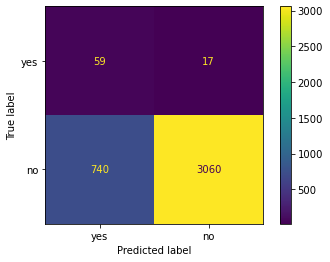

In [32]:
cm = confusion_matrix(Y_test, y_pred)
cmd = ConfusionMatrixDisplay(cm, display_labels=['yes', 'no'])
cmd.plot()